In [1]:
import random
from plot_trajectory_2d import plot_levels, plot_trajectory
import numpy as np
import oracles
import methods
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
random.seed(13)
np.random.seed(13)

# 1 Пункт

In [3]:
def get_mat_rotate(p):
    p = p * np.pi / 180
    c = np.cos(p)
    s = np.sin(p)
    return np.array([[c, s], [-s, c]])

In [4]:
def plot_results(k, p, x_0, line_search_options):
    A = np.eye(2)
    A[0][0] = k
    print("Matrix A:\n", A, "\n")
    S = get_mat_rotate(p)
    A = S @ A @ S.T
    print("Rotated matrix A:\n", A,"\n")
    b = np.array([1, 3])
    oracle = oracles.QuadraticOracle(A, b)
    plot_levels(oracle.func)
    oracle = oracles.QuadraticOracle(A, b)
    method = methods.GradientDescent(
                oracle, x_0,
                tolerance=1e-10,
                line_search_options = line_search_options
        )
    method.run(200)
    plot_trajectory(oracle.func, method.hist['x'])
    print(f"Number of iterations: {len(method.hist['x'])}\n")
    print("x =", method.hist['x_star'])

## Матрица с малым числом обусловленности

* Запуск из точки, которая находится ближе к точке минимума:

Matrix A:
 [[2. 0.]
 [0. 1.]] 

Rotated matrix A:
 [[ 1.75      -0.4330127]
 [-0.4330127  1.25     ]] 

Number of iterations: 86

x = [1.27449763 2.84146922]


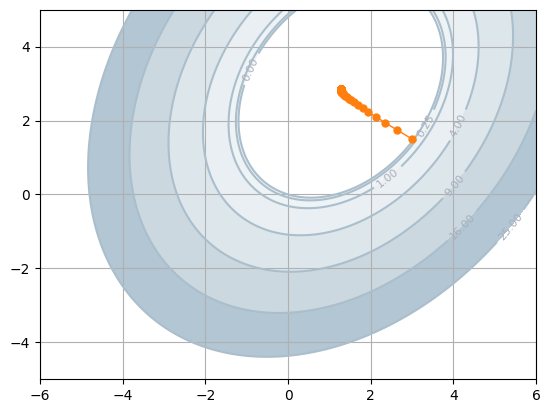

In [5]:
plot_results(2, 30, np.array([3.0, 1.5]), {
                'method': 'Constant',
                'c': 1e-1
                })

Matrix A:
 [[2. 0.]
 [0. 1.]] 

Rotated matrix A:
 [[ 1.75      -0.4330127]
 [-0.4330127  1.25     ]] 

Number of iterations: 4

x = [1.27451905 2.84150635]


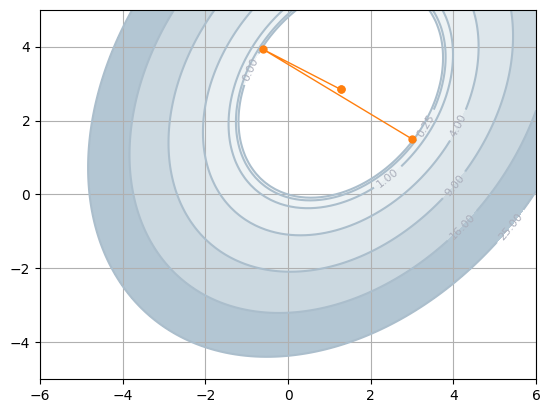

In [6]:
plot_results(2, 30, np.array([3.0, 1.5]), {
                'method': 'Armijo',
                })

Matrix A:
 [[2. 0.]
 [0. 1.]] 

Rotated matrix A:
 [[ 1.75      -0.4330127]
 [-0.4330127  1.25     ]] 

Number of iterations: 5

x = [1.27451905 2.84150635]


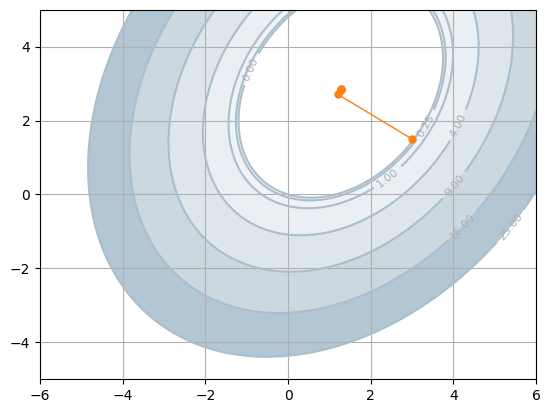

In [7]:
plot_results(2, 30, np.array([3.0, 1.5]), {
                'method': 'Wolfe',
                })

* Запуск из точки, которая находится дальше от точки минимума:

Matrix A:
 [[2. 0.]
 [0. 1.]] 

Rotated matrix A:
 [[ 1.75      -0.4330127]
 [-0.4330127  1.25     ]] 

Number of iterations: 90

x = [1.2744049  2.84130857]


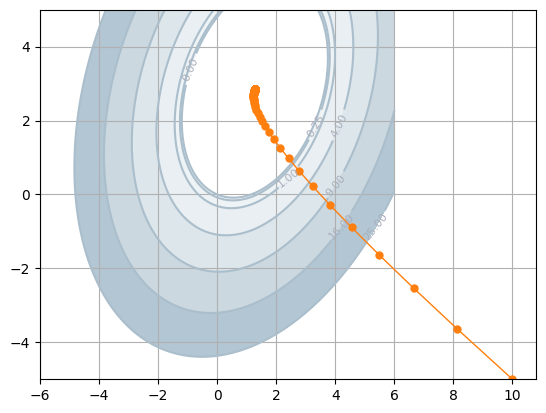

In [8]:
plot_results(2, 30, np.array([10, -5]), {
                'method': 'Constant',
                'c': 1e-1
                })

Matrix A:
 [[2. 0.]
 [0. 1.]] 

Rotated matrix A:
 [[ 1.75      -0.4330127]
 [-0.4330127  1.25     ]] 

Number of iterations: 4

x = [1.27451905 2.84150635]


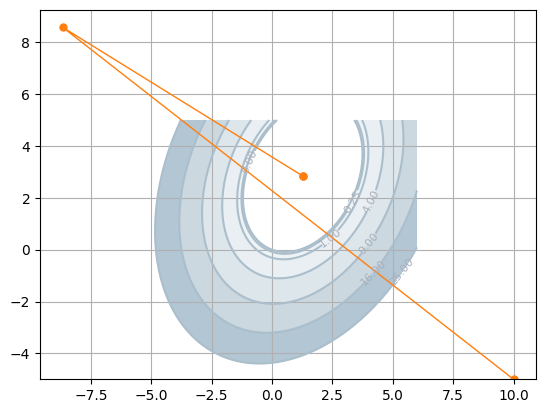

In [9]:
plot_results(2, 30, np.array([10, -5]), {
                'method': 'Armijo',
                'c': 1e-1
                })

Matrix A:
 [[2. 0.]
 [0. 1.]] 

Rotated matrix A:
 [[ 1.75      -0.4330127]
 [-0.4330127  1.25     ]] 

Number of iterations: 5

x = [1.27451905 2.84150635]


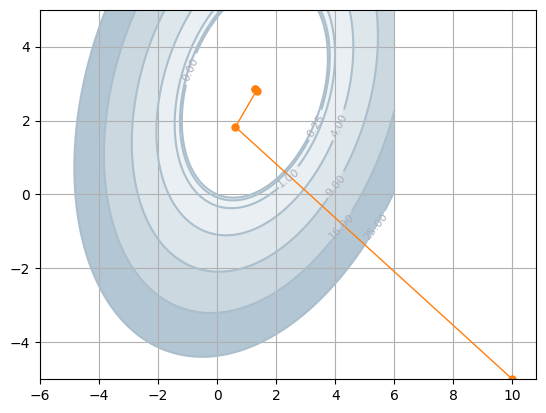

In [10]:
plot_results(2, 30, np.array([10, -5]), {
                'method': 'Wolfe',
                'c': 1e-1
                })

## Матрица с большим числом обусловленности

* Запуск из точки, которая находится ближе к точке минимума:

Matrix A:
 [[20.  0.]
 [ 0.  1.]] 

Rotated matrix A:
 [[15.25       -8.22724134]
 [-8.22724134  5.75      ]] 

Number of iterations: 133

x = [1.5214057  2.69854942]


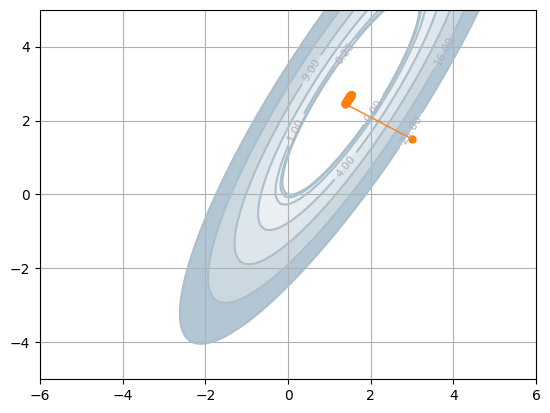

In [11]:
plot_results(20, 30, np.array([3.0, 1.5]), {
                'method': 'Constant',
                'c': 5e-2
                })

Matrix A:
 [[20.  0.]
 [ 0.  1.]] 

Rotated matrix A:
 [[15.25       -8.22724134]
 [-8.22724134  5.75      ]] 

Number of iterations: 106

x = [1.52140435 2.6985471 ]


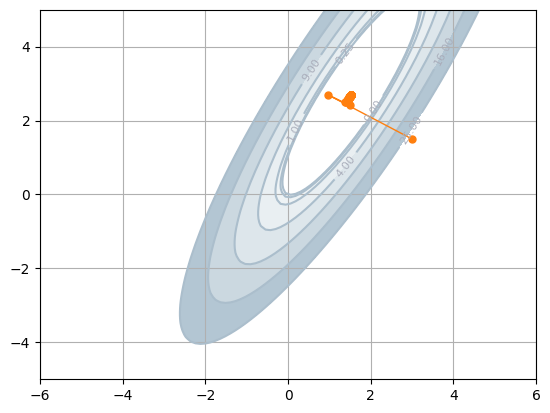

In [12]:
plot_results(20, 30, np.array([3.0, 1.5]), {
                'method': 'Armijo',
                })

Matrix A:
 [[20.  0.]
 [ 0.  1.]] 

Rotated matrix A:
 [[15.25       -8.22724134]
 [-8.22724134  5.75      ]] 

Number of iterations: 5

x = [1.5215862  2.69886207]


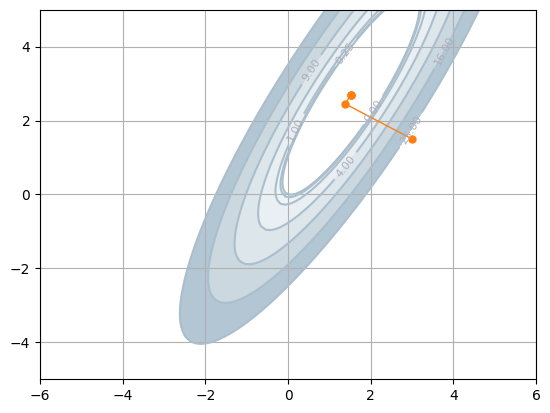

In [13]:
plot_results(20, 30, np.array([3.0, 1.5]), {
                'method': 'Wolfe',
                })

* Запуск из точки, которая находится дальше от точки минимума:

Matrix A:
 [[20.  0.]
 [ 0.  1.]] 

Rotated matrix A:
 [[15.25       -8.22724134]
 [-8.22724134  5.75      ]] 

Number of iterations: 139

x = [1.52050877 2.6969959 ]


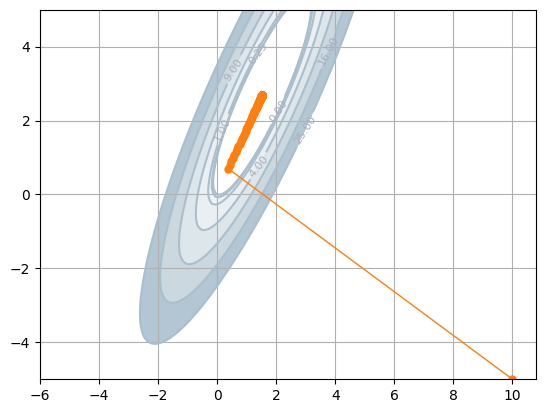

In [14]:
plot_results(20, 30, np.array([10, -5]), {
                'method': 'Constant',
                'c': 5e-2
                })

Matrix A:
 [[20.  0.]
 [ 0.  1.]] 

Rotated matrix A:
 [[15.25       -8.22724134]
 [-8.22724134  5.75      ]] 

Number of iterations: 111

x = [1.52051684 2.69700988]


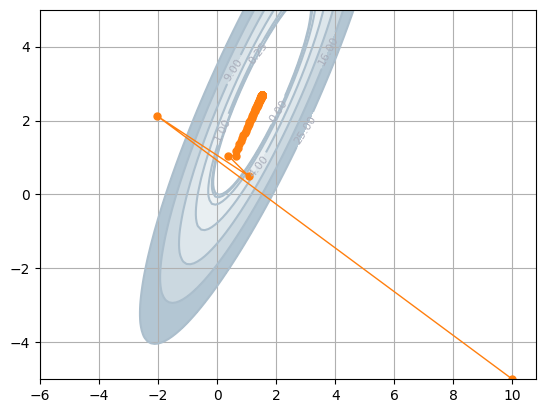

In [15]:
plot_results(20, 30, np.array([10, -5]), {
                'method': 'Armijo',
                })

Matrix A:
 [[20.  0.]
 [ 0.  1.]] 

Rotated matrix A:
 [[15.25       -8.22724134]
 [-8.22724134  5.75      ]] 

Number of iterations: 5

x = [1.5215862  2.69886207]


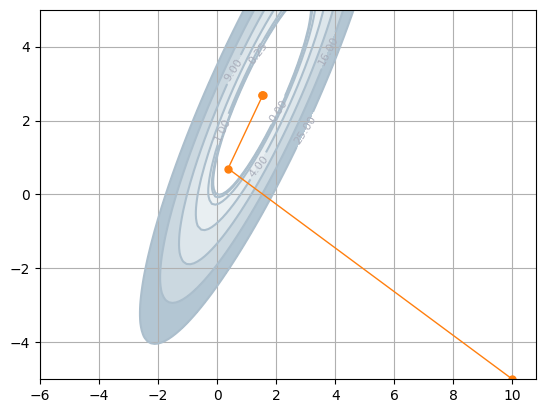

In [16]:
plot_results(20, 30, np.array([10, -5]), {
                'method': 'Wolfe',
                })

Чем больше число обусловленности, тем больше итераций требуется, тоже верно и про выбор начальной точки - чем дальше, тем больше итераций требуется. Хотя данное увеличение не сказалось на методе Вульфа. Особенно сильно разница заметна в методе Армихо при увеличении числа обусловленности.
Лучше всех показал себя метод Вульфа. Что и не удивительно, так как размер шага подбирается наиболее лучшим образом. Хочется также заметить, что для обычного градиентного спуска приходилось в ручную подбирать константу, иначе он расходился

# 2 Пункт

In [17]:
def get_num(n, k, x_0, line_search_options):
    d = np.random.randint(1, k, size=n - 2).tolist()
    d.append(k)
    d.append(1)
    d = np.array(d)
    np.random.shuffle(d)
    q, _ = la.qr(np.random.rand(n, n))
    A = q.T @ np.diag(d).astype(float) @ q
    b = np.random.randint(1, len(A), size=len(A)).astype(float)
    oracle = oracles.QuadraticOracle(A.copy(), b.copy())
    method = methods.GradientDescent(
                oracle, x_0,
                tolerance=1e-10,
                line_search_options = line_search_options
        )
    method.run(5000)
    return len(method.hist['grad_norm'])

## 1

In [18]:
res = []

k = [5, 10, 50, 60, 100, 500]

for i in range(5):
    res.append([])
    for j in k:
        x_0 = np.random.rand(5)
        res[i].append(get_num(5, j, x_0.copy(), {
                'method': 'Wolfe',
                }))

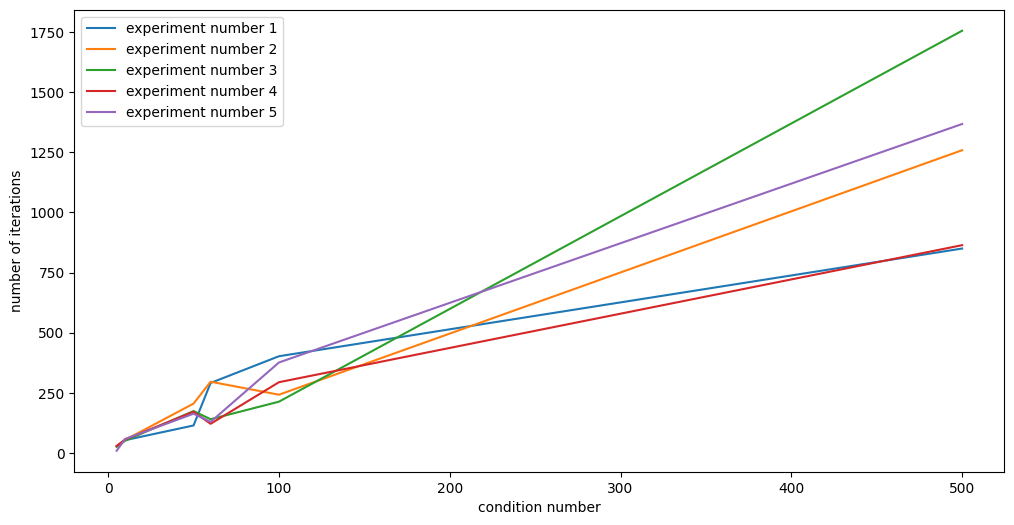

In [19]:
plt.figure(figsize=(12,6))
for i in range(len(res)):
    plt.plot(k, res[i], label = f"experiment number {i + 1}")
plt.ylabel("number of iterations")
plt.xlabel("condition number")
plt.legend()

## 2

In [20]:
res = []
n = [10, 100, 1000]
k = [10, 100, 1000, 1500]
for q in n:
    res.append([])
    for i in range(5):
        res[-1].append([])
        for j in k:
            x_0 = np.random.rand(q)
            res[-1][-1].append(get_num(q, j, x_0.copy(), {
                    'method': 'Wolfe',
                    }))

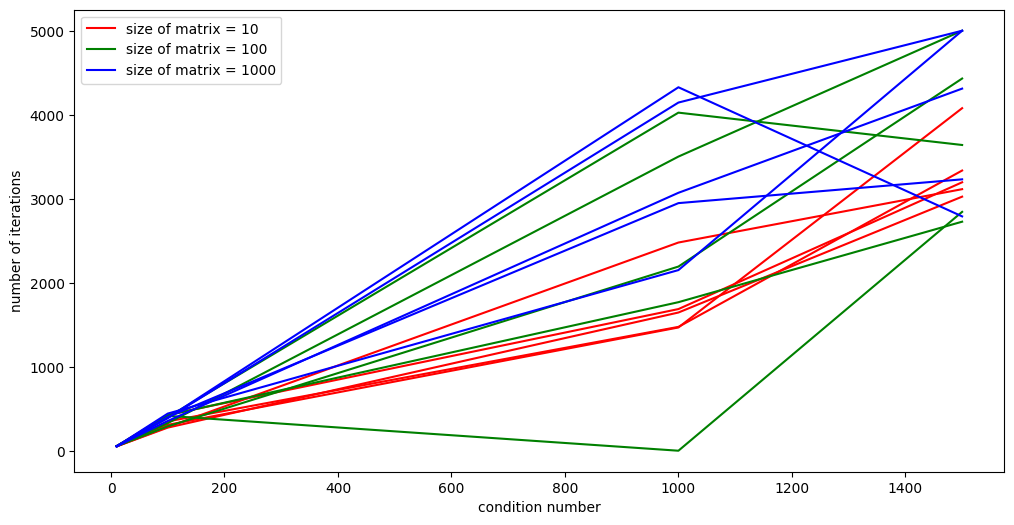

In [21]:
plt.figure(figsize=(12,6))

for i, cl, nam in zip(res, ['r', 'g', 'b'], n):
    for t, j in enumerate(i):
        if t % 5 == 0:
            plt.plot(k, j, color = cl, label = f"size of matrix = {nam}")
        else:
            plt.plot(k, j, color = cl)
plt.ylabel("number of iterations")
plt.xlabel("condition number")
plt.legend()

Количество итераций в большинстве своем увеличивается с ростом числа обусловленности и ростом размерности, что соотносится с теорией.